In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_pools = pd.read_csv('../data/raw/pool_list_complete.csv')
df_pool_events = pd.read_csv('../data/raw/eventos_pool_sync_mint_burn.csv')
df_tokens_metadata = pd.read_csv('../data/raw/token_metadata_complete.csv')
df_token_transfers = pd.read_csv('../data/raw/eventos_transfers_tokens.csv')

In [3]:
df_pools.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   pair_address      998 non-null    object
 1   token0            998 non-null    object
 2   token1            998 non-null    object
 3   creation_time     998 non-null    object
 4   block_number      998 non-null    int64 
 5   transaction_hash  998 non-null    object
 6   token0_decimals   998 non-null    int64 
 7   token1_decimals   998 non-null    int64 
 8   sync_count        998 non-null    int64 
 9   transfer_count    998 non-null    int64 
 10  burn_count        998 non-null    int64 
 11  mint_count        998 non-null    int64 
 12  pair              998 non-null    object
 13  estrato           998 non-null    object
 14  token_address     998 non-null    object
 15  pool_creator      998 non-null    object
dtypes: int64(7), object(9)
memory usage: 124.9+ KB


In [4]:
df_pool_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1835994 entries, 0 to 1835993
Data columns (total 10 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   event_type               object
 1   pair_address             object
 2   sender                   object
 3   to_address               object
 4   amount0_or_reserve0_hex  object
 5   amount1_or_reserve1_hex  object
 6   block_timestamp          object
 7   block_number             int64 
 8   transaction_hash         object
 9   log_index                int64 
dtypes: int64(2), object(8)
memory usage: 140.1+ MB


In [5]:
df_tokens_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   token_address             998 non-null    object
 1   token_creator             998 non-null    object
 2   token_creation_tx         998 non-null    object
 3   token_creation_block      998 non-null    int64 
 4   token_creation_timestamp  998 non-null    object
dtypes: int64(1), object(4)
memory usage: 39.1+ KB


In [6]:
df_token_transfers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8717043 entries, 0 to 8717042
Data columns (total 8 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   token_address     object
 1   from_address      object
 2   to_address        object
 3   value             object
 4   transaction_hash  object
 5   block_timestamp   object
 6   block_number      int64 
 7   log_index         int64 
dtypes: int64(2), object(6)
memory usage: 532.0+ MB


In [7]:

# Verifica los primeros Sync events
sync_events = df_pool_events[df_pool_events['event_type'] == 'sync'].head(5)
print(sync_events[['pair_address', 'amount0_or_reserve0_hex', 'amount1_or_reserve1_hex']])

# Verifica un pool específico

print(df_pools[['pair_address', 'token0', 'token1', 'token_address']].head(5))

                                 pair_address  \
0  0xbb2b8038a1640196fbe3e38816f3e67cba72d940   
2  0xbb2b8038a1640196fbe3e38816f3e67cba72d940   
3  0xbb2b8038a1640196fbe3e38816f3e67cba72d940   
4  0xbb2b8038a1640196fbe3e38816f3e67cba72d940   
6  0xbb2b8038a1640196fbe3e38816f3e67cba72d940   

                             amount0_or_reserve0_hex  \
0  0x00000000000000000000000000000000000000000000...   
2  0x00000000000000000000000000000000000000000000...   
3  0x00000000000000000000000000000000000000000000...   
4  0x00000000000000000000000000000000000000000000...   
6  0x00000000000000000000000000000000000000000000...   

                             amount1_or_reserve1_hex  
0  0x00000000000000000000000000000000000000000000...  
2  0x00000000000000000000000000000000000000000000...  
3  0x00000000000000000000000000000000000000000000...  
4  0x00000000000000000000000000000000000000000000...  
6  0x00000000000000000000000000000000000000000000...  
                                 pair_

In [8]:
df_pool_events[df_pool_events['event_type'] == 'sync'].head()

,event_type,pair_address,sender,to_address,amount0_or_reserve0_hex,amount1_or_reserve1_hex,block_timestamp,block_number,transaction_hash,log_index
0,sync,0xbb2b8038a1640196fbe3e38816f3e67cba72d940,NaN,NaN,0x00000000000000000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,2020-05-18 16:43:42+00:00,10091132,0xb0e2a42e44c9d809841fc8517e5e02425db2a9f3e7a5...,57
2,sync,0xbb2b8038a1640196fbe3e38816f3e67cba72d940,NaN,NaN,0x00000000000000000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,2020-05-18 17:45:15+00:00,10091412,0x3753b59220cf80559c7d5e90f6dec6231626d689bb38...,116
3,sync,0xbb2b8038a1640196fbe3e38816f3e67cba72d940,NaN,NaN,0x00000000000000000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,2020-05-18 17:51:29+00:00,10091436,0x79d67b62bd303f45ab9127c92e03f1f284365e8cfdcf...,44
4,sync,0xbb2b8038a1640196fbe3e38816f3e67cba72d940,NaN,NaN,0x00000000000000000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,2020-05-18 17:52:48+00:00,10091445,0xf756921c6d7df7f2acc6d1ab52a7133239abe65f3a50...,61
6,sync,0xbb2b8038a1640196fbe3e38816f3e67cba72d940,NaN,NaN,0x00000000000000000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,2020-05-18 18:03:43+00:00,10091498,0xece9a3b2491884322589ea221381adb506711b671d7e...,10


In [9]:
df_pool_events[df_pool_events['event_type'] == 'mint'].head()

,event_type,pair_address,sender,to_address,amount0_or_reserve0_hex,amount1_or_reserve1_hex,block_timestamp,block_number,transaction_hash,log_index
1,mint,0xbb2b8038a1640196fbe3e38816f3e67cba72d940,0x3f6cdd93e4a1c2df9934cb90d09040ccfc155f93,NaN,0x00000000000000000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,2020-05-18 16:43:42+00:00,10091132,0xb0e2a42e44c9d809841fc8517e5e02425db2a9f3e7a5...,58
5,mint,0xbb2b8038a1640196fbe3e38816f3e67cba72d940,0x3f6cdd93e4a1c2df9934cb90d09040ccfc155f93,NaN,0x00000000000000000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,2020-05-18 17:52:48+00:00,10091445,0xf756921c6d7df7f2acc6d1ab52a7133239abe65f3a50...,62
10,mint,0x6aeebc2f5c979fd5c4361c2d288e55ac6b7e39bb,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,NaN,0x00000000000000000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,2020-05-18 18:24:06+00:00,10091578,0x8f63e120dc8d57064502c419539200415a3af965d5a8...,15
15,mint,0xbb2b8038a1640196fbe3e38816f3e67cba72d940,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,NaN,0x00000000000000000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,2020-05-18 19:16:35+00:00,10091783,0x4f4ae77de8801b15cc397714509e0859749036bc9393...,49
17,mint,0xf49c43ae0faf37217bdcb00df478cf793edd6687,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,NaN,0x00000000000000000000000000000000000000000000...,0x00000000000000000000000000000000000000000000...,2020-05-18 19:52:36+00:00,10091947,0x691a026bd9a84bcf4e66e5ab8f060dc12d5ec86fb675...,41


In [10]:
# 1. Conteo de eventos por tipo
print("Eventos por tipo:")
print(df_pool_events['event_type'].value_counts())

# 2. Convierte un reserve de hex a decimal para verificar
reserve0_hex = sync_events.iloc[0]['amount0_or_reserve0_hex']
reserve1_hex = sync_events.iloc[0]['amount1_or_reserve1_hex']

reserve0_decimal = int(reserve0_hex, 16)
reserve1_decimal = int(reserve1_hex, 16)

print(f"\nEjemplo de conversión:")
print(f"Reserve0 hex: {reserve0_hex}")
print(f"Reserve0 decimal: {reserve0_decimal}")
print(f"Reserve1 hex: {reserve1_hex}")
print(f"Reserve1 decimal: {reserve1_decimal}")

# 3. Verifica estructura de pools_metadata
print("\nPrimeros pools con decimals:")
print(df_pools[['pair_address', 'token0', 'token1', 'token0_decimals', 'token1_decimals', 'token_address']].head())

# 4. Identifica cuál token es wETH en cada pool
WETH_ADDRESS = '0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2'
df_pools['weth_is_token0'] = df_pools['token0'].str.lower() == WETH_ADDRESS.lower()
df_pools['weth_is_token1'] = df_pools['token1'].str.lower() == WETH_ADDRESS.lower()

print("\nPools con wETH:")
print(df_pools[['pair_address', 'weth_is_token0', 'weth_is_token1']].head())
print(f"\nPools con wETH como token0: {df_pools['weth_is_token0'].sum()}")
print(f"Pools con wETH como token1: {df_pools['weth_is_token1'].sum()}")

Eventos por tipo:
event_type
sync    1755374
mint      51078
burn      29542
Name: count, dtype: int64

Ejemplo de conversión:
Reserve0 hex: 0x0000000000000000000000000000000000000000000000000000000000a7a01c
Reserve0 decimal: 10985500
Reserve1 hex: 0x0000000000000000000000000000000000000000000000003bacb3b6b7fc37b1
Reserve1 decimal: 4300009341584160689

Primeros pools con decimals:
                                 pair_address  \
0  0x78a8805acf5d1a7b28a83d79bccda0def40b4335   
1  0xa5ffe698f774ef96871a9641ff2b56b8ab97fc12   
2  0x7e47c5c0fe5838e9c29735923547b388bf95b7b7   
3  0xe5c1ad5f6f3f051cccebf9236e712dd1bf45b61a   
4  0xe89052e63a5914ed4fb5e5b7d507c36b8b7a4386   

                                       token0  \
0  0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2   
1  0x219865b49bea3a1638084cd1e8c6c87e36de308f   
2  0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2   
3  0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2   
4  0x81835d805d3b4baeaf31655ee62fa6b7cafdb599   

                          

In [11]:
df_pools.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   pair_address      998 non-null    object
 1   token0            998 non-null    object
 2   token1            998 non-null    object
 3   creation_time     998 non-null    object
 4   block_number      998 non-null    int64 
 5   transaction_hash  998 non-null    object
 6   token0_decimals   998 non-null    int64 
 7   token1_decimals   998 non-null    int64 
 8   sync_count        998 non-null    int64 
 9   transfer_count    998 non-null    int64 
 10  burn_count        998 non-null    int64 
 11  mint_count        998 non-null    int64 
 12  pair              998 non-null    object
 13  estrato           998 non-null    object
 14  token_address     998 non-null    object
 15  pool_creator      998 non-null    object
 16  weth_is_token0    998 non-null    bool  
 17  weth_is_token1  

In [12]:
WETH = "0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2"

def plot_time_series(token_address, df_pools, df_pool_events, eval_blocks=None):
    
    # 1. Obtener info del pool
    pool_info = df_pools[df_pools['token_address'] == token_address].iloc[0]
    pair_address = pool_info['pair_address']
    weth_is_token0 = pool_info['weth_is_token0']
    
    # Decimales del token no-WETH
    token_decimals = pool_info['token1_decimals'] if weth_is_token0 else pool_info['token0_decimals']

    # 2. Filtrar Sync events del pool
    sync_events = df_pool_events[
        (df_pool_events['pair_address'] == pair_address) &
        (df_pool_events['event_type'] == 'sync')
    ].copy()

    # 3. Convertir hex a decimal
    sync_events['reserve0'] = sync_events['amount0_or_reserve0_hex'].apply(lambda x: int(x, 16))
    sync_events['reserve1'] = sync_events['amount1_or_reserve1_hex'].apply(lambda x: int(x, 16))

    # 4. Identificar reservas de WETH y token
    if weth_is_token0:
        sync_events['weth_reserve'] = sync_events['reserve0'] / 10**18
        sync_events['token_reserve'] = sync_events['reserve1'] / 10**token_decimals
    else:
        sync_events['weth_reserve'] = sync_events['reserve1'] / 10**18
        sync_events['token_reserve'] = sync_events['reserve0'] / 10**token_decimals

    # 5. Calcular métricas
    sync_events['liquidity'] = sync_events['weth_reserve'] * sync_events['token_reserve']
    sync_events['price'] = sync_events['weth_reserve'] / sync_events['token_reserve']

    # 6. Graficar
    colors = ['red', 'peru', 'orange', 'darkblue', 'teal', 'grey']

    plt.plot(sync_events['block_number'], sync_events['liquidity'], color='black', linewidth=1)
    plt.ylabel("Liquidity")
    plt.xlabel("Block")
    if eval_blocks:
        for i, block in enumerate(eval_blocks):
            plt.axvline(x=block, label=f'Evaluation block {block}', color=colors[i])
        plt.legend()
    plt.show()

    plt.plot(sync_events['block_number'], sync_events['price'], color='black', linewidth=1)
    plt.ylabel("Price")
    plt.xlabel("Block")
    if eval_blocks:
        for i, block in enumerate(eval_blocks):
            plt.axvline(x=block, label=f'Evaluation block {block}', color=colors[i])
        plt.legend()
    plt.show()

In [13]:
token_address = "0x219865b49bea3a1638084cd1e8c6c87e36de308f"
pool_address = "0xa5ffe698f774ef96871a9641ff2b56b8ab97fc12"

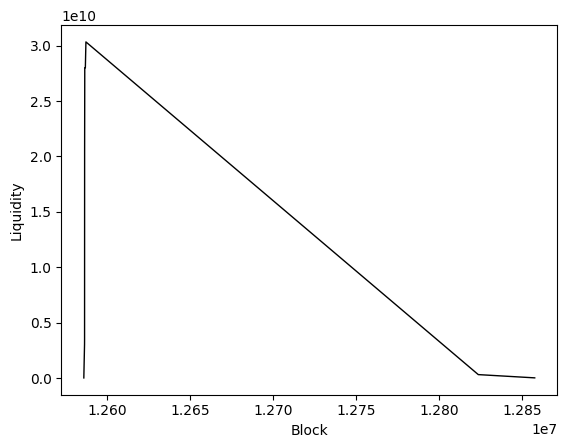

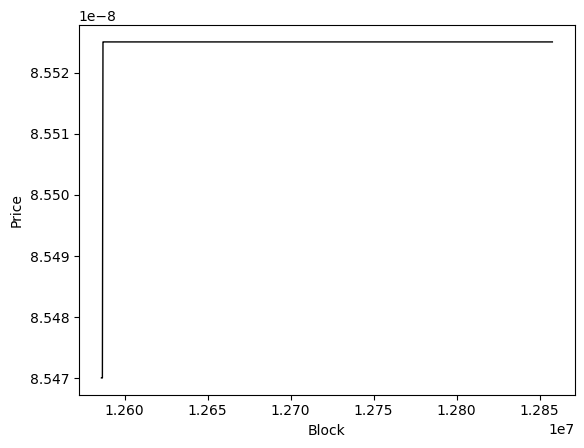

In [14]:
plot_time_series(
    token_address,  # string con la dirección del token, ej. "0xdd974d5c..."
    df_pools,       # tu DataFrame de pools
    df_pool_events, # tu DataFrame de evento
)

In [15]:
# Ver formato de token_address en df_pools
print(df_pools['token_address'].iloc[0])

# Ver qué estás pasando
print(repr(token_address))

# Verificar si existe
print(df_pools[df_pools['token_address'] == token_address])

0xebf919584021075d3f7bf3d6cf1c6dc318221eff
'0x219865b49bea3a1638084cd1e8c6c87e36de308f'
                                 pair_address  \
1  0xa5ffe698f774ef96871a9641ff2b56b8ab97fc12   

                                       token0  \
1  0x219865b49bea3a1638084cd1e8c6c87e36de308f   

                                       token1            creation_time  \
1  0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2  2021-06-07 07:31:28 UTC   

   block_number                                   transaction_hash  \
1      12586083  0xc4e29f47011124d6056a10d204570dc310f44f8fd694...   

   token0_decimals  token1_decimals  sync_count  transfer_count  burn_count  \
1               18               18           9              11           2   

   mint_count                                               pair estrato  \
1           6  0x219865b49bea3a1638084cd1e8c6c87e36de308f_0xc...    bajo   

                                token_address  \
1  0x219865b49bea3a1638084cd1e8c6c87e36de308f   

             

# FUNCTIONS

Pool features:

In [44]:
def get_pool_features(token_address, df_pools, df_pool_events, eval_block):
    
    pool_info = df_pools[df_pools['token_address'] == token_address].iloc[0]
    pair_address = pool_info['pair_address']
    weth_is_token0 = pool_info['weth_is_token0']
    token_decimals = pool_info['token1_decimals'] if weth_is_token0 else pool_info['token0_decimals']

    syncs = df_pool_events[
        (df_pool_events['pair_address'] == pair_address) &
        (df_pool_events['event_type'] == 'sync') &
        (df_pool_events['block_number'] < eval_block)
    ].copy()

    # Guard: sin actividad en la ventana
    if len(syncs) == 0:
        return {
            'n_syncs': 0,
            'WETH': 0,
            'prices': 0,
            'liquidity': 0,
        }

    syncs['reserve0'] = syncs['amount0_or_reserve0_hex'].apply(lambda x: int(x, 16))
    syncs['reserve1'] = syncs['amount1_or_reserve1_hex'].apply(lambda x: int(x, 16))

    if weth_is_token0:
        WETH = syncs['reserve0'] / 10**18
        TOKEN = syncs['reserve1'] / 10**token_decimals
    else:
        WETH = syncs['reserve1'] / 10**18
        TOKEN = syncs['reserve0'] / 10**token_decimals

    # Guard: evitar división por cero
    TOKEN = TOKEN.replace(0, float('nan'))
    PRICES = WETH / TOKEN
    LIQUIDITY = WETH * TOKEN

    return {
        'n_syncs': len(syncs),
        'WETH': WETH.iloc[-1],
        'prices': PRICES.iloc[-1],
        'liquidity': LIQUIDITY.iloc[-1],
    }

Transfer features:

In [17]:
from collections import defaultdict

ETH_ADDRESS = "0x0000000000000000000000000000000000000000"
DEAD_ADDRESS = "0x000000000000000000000000000000000000dead"

def distribution_metric(balances, total_supply):
    """Calcula HHI dado un diccionario de balances y el supply total"""
    return sum(
        (value / total_supply) ** 2
        for holder, value in balances.items()
        if holder not in [ETH_ADDRESS, DEAD_ADDRESS]
    )

def get_curve(token_address, df_token_transfers, eval_block):
    """Calcula HHI de distribución del token"""
    transfers = df_token_transfers[
        (df_token_transfers['token_address'] == token_address) &
        (df_token_transfers['block_number'] < eval_block)
    ].sort_values('block_number')

    balances = defaultdict(lambda: 0)
    total_supply = 0

    for _, row in transfers.iterrows():
        from_ = row['from_address']
        to_ = row['to_address']
        value = float(row['value'])

        balances[from_] -= value
        balances[to_] += value

        if from_ == ETH_ADDRESS:
            total_supply += value
            balances[from_] = 0
        if to_ == ETH_ADDRESS:
            total_supply -= value
            balances[to_] = 0

    if total_supply != 0:
        curve = distribution_metric(balances, total_supply)
    else:
        curve = 1

    return {'tx_curve': curve}

def get_transfer_features(token_address, df_token_transfers, eval_block):
    """Calcula features de transfers del token"""
    transfers = df_token_transfers[
        (df_token_transfers['token_address'] == token_address) &
        (df_token_transfers['block_number'] < eval_block)
    ].copy()

    n_unique_addresses = len(
        set(transfers['from_address'].tolist() + transfers['to_address'].tolist())
    )

    return {
        'num_transactions': len(transfers),
        'n_unique_addresses': n_unique_addresses,
    }

def get_lp_features(token_address, eval_block, df_pools, df_pool_events, df_tokens_metadata):
    
    pool_info = df_pools[df_pools['token_address'] == token_address].iloc[0]
    pair_address = pool_info['pair_address']
    pool_creation_block = pool_info['block_number']
    token_creation_block = df_tokens_metadata[
        df_tokens_metadata['token_address'] == token_address
    ]['token_creation_block'].iloc[0]

    lp_events = df_pool_events[
        (df_pool_events['pair_address'] == pair_address) &
        (df_pool_events['block_number'] < eval_block)
    ]

    return {
        'mints': len(lp_events[lp_events['event_type'] == 'mint']),
        'burns': len(lp_events[lp_events['event_type'] == 'burn']),
        'difference_token_pool': pool_creation_block - token_creation_block
    }

# HEURISTICS

In [27]:
def compute_drawdown(series):
    """Caída máxima relativa desde el pico hasta el valle"""
    running_max = np.maximum.accumulate(series)
    valley_idx = np.argmax(running_max - series)
    peak_idx = np.argmax(series[:valley_idx]) if valley_idx > 0 else 0
    
    peak_val = series[peak_idx]
    valley_val = series[valley_idx]
    
    if peak_val == 0:
        return 0, peak_idx, valley_idx
    
    mdd = (valley_val - peak_val) / peak_val
    return mdd, peak_idx, valley_idx


def compute_recovery(series, peak_idx, valley_idx):
    """Cuánto se recuperó la serie después del valle"""
    peak_val = series[peak_idx]
    valley_val = series[valley_idx]
    drop = peak_val - valley_val
    
    if drop == 0:
        return 0
    
    return (series[-1] - valley_val) / drop


def build_reserve_series(syncs, weth_position, token_decimals):
    """Construye series de liquidez y precio desde eventos Sync"""
    token_position = 1 - weth_position
    liquidity, prices, blocks = [], [], []
    
    for _, row in syncs.iterrows():
        weth_r = int(row[f'amount{weth_position}_or_reserve{weth_position}_hex'], 16) / 10**18
        token_r = int(row[f'amount{token_position}_or_reserve{token_position}_hex'], 16) / 10**token_decimals
        
        if token_r == 0 or weth_r == 0:
            continue
        
        blocks.append(row['block_number'])
        liquidity.append(weth_r * token_r)
        prices.append(weth_r / token_r)
    
    return np.array(blocks), np.array(liquidity), np.array(prices)


def extract_pool_features(token_address, df_pools, df_pool_events, blockstudy):
    
    pool_info = df_pools[df_pools['token_address'] == token_address].iloc[0]
    pair_address = pool_info['pair_address']
    weth_position = 0 if pool_info['weth_is_token0'] else 1
    token_position = 1 - weth_position
    token_decimals = pool_info[f'token{token_position}_decimals']
    
    syncs = df_pool_events[
        (df_pool_events['pair_address'] == pair_address) &
        (df_pool_events['event_type'] == 'sync')
    ].sort_values('block_number')
    
    if len(syncs) < 5:
        return None
    
    blocks, liquidity, prices = build_reserve_series(syncs, weth_position, token_decimals)
    
    if len(blocks) < 5:
        return None
    
    liq_mdd, liq_peak, liq_valley = compute_drawdown(liquidity)
    liq_rc = compute_recovery(liquidity, liq_peak, liq_valley)
    
    price_mdd, price_peak, price_valley = compute_drawdown(prices)
    price_rc = compute_recovery(prices, price_peak, price_valley)
    
    return {
        'token_address': token_address,
        'pair_address': pair_address,
        'inactive': int(blockstudy - blocks[-1] > 160000),
        'late_creation': int(blockstudy - blocks[0] < 160000),
        'liq_mdd': liq_mdd,
        'liq_rc': liq_rc,
        'price_mdd': price_mdd,
        'price_rc': price_rc,
        'total_syncs': len(blocks)
    }

In [29]:
BLOCKSTUDY = 13220488

In [32]:
last_transfer = df_token_transfers.groupby('token_address')['block_number'].max()
inactive_transfers = (BLOCKSTUDY - last_transfer > 160000).astype(int)

In [45]:
def assign_fraud_labels(df_pool_features, inactive_transfers_series):
    
    working_df = df_pool_features.copy()
    
    # Combinar señal de inactividad: pool Y transfers deben estar inactivos
    working_df['transfer_inactive'] = inactive_transfers_series
    working_df['fully_inactive'] = (working_df['inactive'] == 1) & (working_df['transfer_inactive'] == 1)
    
    # Solo tokens con suficiente historia y completamente abandonados
    eligible = working_df[
        (working_df['fully_inactive'] == True) & 
        (working_df['late_creation'] == 0)
    ]
    
    records = []
    
    # Esquema 1: vaciado total de liquidez sin recuperación
    liquidity_stolen = eligible[
        (eligible['liq_mdd'] == -1.0) &
        (eligible['liq_rc'] <= 0.2)
    ]
    for token in liquidity_stolen.index:
        records.append({
            'token_address': token,
            'pair_address': working_df.loc[token, 'pair_address'],
            'label': 0,
            'fraud_type': 'liquidity_stealing'
        })
    
    # Esquema 2: colapso de precio sin movimiento de liquidez
    dumping = eligible[
        (eligible['liq_mdd'] == 0) &
        (eligible['price_mdd'].between(-1.0, -0.9)) &
        (eligible['price_rc'].between(0, 0.01))
    ]
    for token in dumping.index:
        records.append({
            'token_address': token,
            'pair_address': working_df.loc[token, 'pair_address'],
            'label': 0,
            'fraud_type': 'dumping'
        })
    
    return pd.DataFrame(records)

In [46]:
def build_label_dataframe(df_pools, df_pool_events, df_token_transfers, blockstudy):
    
    # Features intermedios para labeling
    label_features_list = []
    for token in df_pools['token_address']:
        result = extract_pool_features(token, df_pools, df_pool_events, blockstudy)
        if result:
            label_features_list.append(result)
    
    df_label_features = pd.DataFrame(label_features_list).set_index('token_address')
    
    # Inactividad transfers
    inactive_transfers = (blockstudy - df_token_transfers.groupby('token_address')['block_number'].max() > 160000).astype(int)
    
    # Asignar labels
    df_labels = assign_fraud_labels(df_label_features, inactive_transfers)
    
    return df_labels

# GENERAR DATASET

In [47]:
WINDOW = 6646
def compute_features(token_address, df_pools, df_pool_events, df_token_transfers, df_tokens_metadata):
    
    pool_info = df_pools[df_pools['token_address'] == token_address].iloc[0]
    first_sync_block = df_pool_events[
        (df_pool_events['pair_address'] == pool_info['pair_address']) &
        (df_pool_events['event_type'] == 'sync')
    ]['block_number'].min()
    
    eval_block = first_sync_block + WINDOW
    
    features = {}
    features.update(get_pool_features(token_address, df_pools, df_pool_events, eval_block))
    features.update(get_transfer_features(token_address, df_token_transfers, eval_block))
    features.update(get_curve(token_address, df_token_transfers, eval_block))
    features.update(get_lp_features(token_address, eval_block, df_pools, df_pool_events, df_tokens_metadata))
    
    return features

In [48]:
WINDOW = 6646  # 24h
BLOCKSTUDY = 13220488

# 1. Labeling
df_labels = build_label_dataframe(df_pools, df_pool_events, df_token_transfers, BLOCKSTUDY)
print(f"Tokens etiquetados: {len(df_labels)}")
print(df_labels['fraud_type'].value_counts())

# 2. Features solo para tokens etiquetados
feature_list = []
for token in df_labels['token_address']:
    try:
        result = compute_features(token, df_pools, df_pool_events, df_token_transfers, df_tokens_metadata)
        if result:
            result['token_address'] = token
            feature_list.append(result)
    except Exception as e:
        print(f"Error en {token}: {e}")

df_features = pd.DataFrame(feature_list).set_index('token_address')

# 3. Dataset final
df_final = df_features.join(df_labels.set_index('token_address')[['label', 'fraud_type']], how='inner')
print(df_final.shape)
print(df_final.columns.tolist())

Tokens etiquetados: 673
fraud_type
liquidity_stealing    643
dumping                30
Name: count, dtype: int64
(673, 12)
['n_syncs', 'WETH', 'prices', 'liquidity', 'num_transactions', 'n_unique_addresses', 'tx_curve', 'mints', 'burns', 'difference_token_pool', 'label', 'fraud_type']


In [49]:
df_final.head()

,n_syncs,WETH,prices,liquidity,num_transactions,n_unique_addresses,tx_curve,mints,burns,difference_token_pool,label,fraud_type
token_address,,,,,,,,,,,,
0xebf919584021075d3f7bf3d6cf1c6dc318221eff,9,3.700000e-17,1.332997e-03,1.027009e-30,10,7,1.000000,1,1,22,0,liquidity_stealing
0xcccdb294b52fc00051bf694fc798efee33bc0358,12,6.583061e+00,7.875194e-12,5.502937e+12,13,13,0.702163,1,0,11,0,liquidity_stealing
0x81835d805d3b4baeaf31655ee62fa6b7cafdb599,9,1.000000e-18,1.023583e-09,9.769608e-28,11,6,0.999996,5,1,178,0,liquidity_stealing
0x43da623816e6249cdd8462a426d8fce9164dfd8c,7,4.004323e+02,1.969788e-03,8.140268e+07,199,198,1.000000,1,0,75,0,liquidity_stealing
0x04b36ce1a6e8f6255ee82c9647f6357e2f4668e8,7,1.000000e-18,1.682061e-07,5.945087e-30,9,9,0.715170,1,1,27,0,liquidity_stealing
